In [298]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Chcemy przewidzieć cenę za m2
## Interesują nas mieszkania:
### - pokoje: maksymalnie 4
### - metraż: poniżej 80m2
### - cena: poniżej 850 tys.
### - lokalizacja: LSM, Czuby, Bronowice, Felin, Wrotków, Węglinek, Śródmieście, Czechów

In [299]:
df = pd.read_csv('data/results.csv', usecols=['meters', 'price', 'rooms', 'dealer', 'district'], na_values=['Zapytajocenę'])

In [300]:
df = df[df['meters'] < 80][df['rooms'] < 5][df['price'] < 850000]

/home/adsum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [301]:
df = df[df['district'].isin(['LSM', 'Czuby', 'Bronowice', 'Felin', 'Wrotków', 'Węglinek', 'Śródmieście', 'Czechów']) ]
#subsetDataFrame = dfObj[dfObj['Product'].isin(['Mangos', 'Grapes']) ]

In [302]:
df['price'] = round(df['price'] / df['meters'])

In [303]:
df.rename(columns={'price': 'price_m2'}, inplace=True)

In [304]:
len(df)

1425

# Struktura danych

In [305]:
df

,meters,price_m2,rooms,dealer,district
0,61.80,5971.0,4,Ofertaprywatna,LSM
1,79.00,6190.0,3,PółnocNieruchomościFranczyza,LSM
4,56.00,6777.0,2,HomeBrokerS.A.,Czuby
9,60.00,4967.0,3,BiuroNieruchomościKWADRAT,Wrotków
10,56.00,6777.0,2,StrefaM,Czuby
...,...,...,...,...,...
2688,59.09,5900.0,3,4tepiętro,Węglinek
2689,37.13,6050.0,2,4tepiętro,Węglinek
2690,62.00,5968.0,3,PanoramaNieruchomości,LSM
2691,30.27,8424.0,2,4tepiętro,Czuby


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 2693
Data columns (total 5 columns):
meters      1425 non-null float64
price_m2    1425 non-null float64
rooms       1425 non-null int64
dealer      1377 non-null object
district    1425 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 66.8+ KB


In [307]:
df.dealer.fillna("EMPTY", inplace=True)

In [308]:
len(df[df.dealer == "EMPTY"])

48

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 2693
Data columns (total 5 columns):
meters      1425 non-null float64
price_m2    1425 non-null float64
rooms       1425 non-null int64
dealer      1425 non-null object
district    1425 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 66.8+ KB


In [310]:
df['dealer'].value_counts()

3KLUCZEs.c.                              232
CLIVUSNieruchomości                      111
4tepiętro                                111
FRANCZEWSKANieruchomościs.c.              93
Arena                                     66
                                        ... 
BiuroNieruchomościKleczkowskiSp.zo.o.      1
AptsLublin                                 1
LUKsp.zo.o.SKA                             1
NOWAKNieruchomości                         1
NieruchomościWschód                        1
Name: dealer, Length: 69, dtype: int64

In [311]:
len(df['dealer'].value_counts())

69

In [312]:
df['district'].value_counts()

Węglinek       285
Czuby          266
Wrotków        259
Śródmieście    157
Bronowice      143
Felin          139
LSM            122
Czechów         54
Name: district, dtype: int64

In [313]:
len(df['district'].value_counts())

8

In [314]:
df.describe()

,meters,price_m2,rooms
count,1425.000000,1425.000000,1425.000000
mean,53.508632,6080.904561,2.590175
std,12.961455,995.390207,0.779235
min,14.620000,2133.000000,1.000000
25%,45.670000,5507.000000,2.000000
50%,53.700000,5900.000000,3.000000
75%,62.850000,6376.000000,3.000000
max,79.950000,12996.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba86e8a2b0>,
      dtype=object)

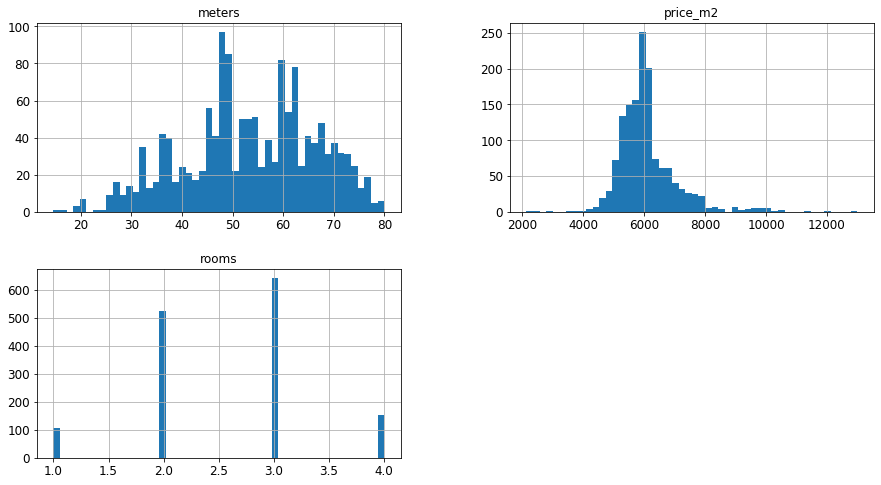

In [315]:
df.hist(bins=50, figsize=(15, 8))

# Zbiór testowy

In [316]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("Uczące", len(train_set), ", testowe", len(test_set))

Uczące 1140 , testowe 285


### Atrybuty kategorii

In [317]:
df['meters_cat'] = np.ceil(df['meters'] / 1.5)
df['meters_cat'].where(df['meters_cat'] > 16, 16.0, inplace=True)
df['meters_cat'].where(df['meters_cat'] < 52, 52.0, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba86b7ac88>,
      dtype=object)

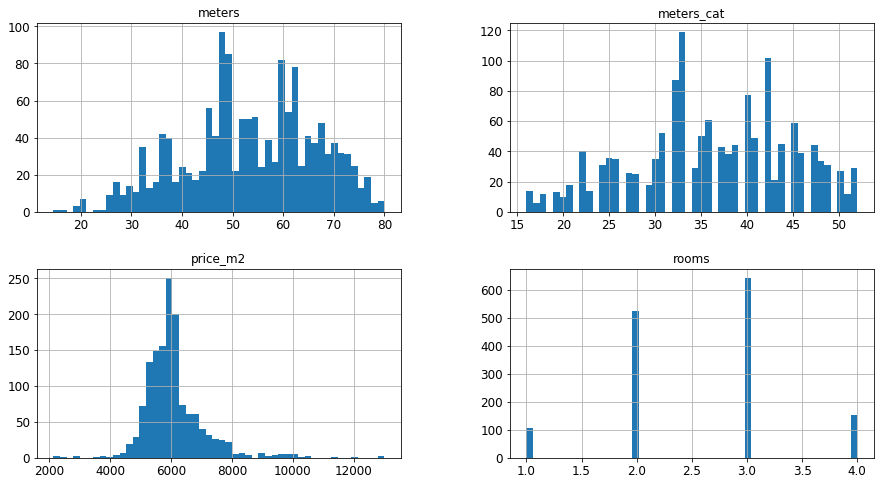

In [318]:
df.hist(bins=50, figsize=(15, 8))

In [319]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["meters_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

/home/adsum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """
/home/adsum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [320]:
df['meters_cat'].value_counts() / len(strat_test_set)

33.0    0.417544
42.0    0.357895
32.0    0.305263
40.0    0.270175
36.0    0.214035
45.0    0.207018
31.0    0.182456
35.0    0.175439
41.0    0.171930
44.0    0.157895
39.0    0.154386
47.0    0.154386
37.0    0.150877
22.0    0.140351
46.0    0.136842
38.0    0.133333
25.0    0.126316
30.0    0.122807
26.0    0.122807
48.0    0.119298
49.0    0.108772
24.0    0.108772
52.0    0.101754
34.0    0.101754
50.0    0.094737
27.0    0.091228
28.0    0.087719
43.0    0.073684
21.0    0.063158
29.0    0.063158
16.0    0.049123
23.0    0.049123
19.0    0.045614
51.0    0.042105
18.0    0.042105
20.0    0.035088
17.0    0.021053
Name: meters_cat, dtype: float64

In [321]:
df['meters_cat'].value_counts() / len(df)

33.0    0.083509
42.0    0.071579
32.0    0.061053
40.0    0.054035
36.0    0.042807
45.0    0.041404
31.0    0.036491
35.0    0.035088
41.0    0.034386
44.0    0.031579
39.0    0.030877
47.0    0.030877
37.0    0.030175
22.0    0.028070
46.0    0.027368
38.0    0.026667
25.0    0.025263
30.0    0.024561
26.0    0.024561
48.0    0.023860
49.0    0.021754
24.0    0.021754
52.0    0.020351
34.0    0.020351
50.0    0.018947
27.0    0.018246
28.0    0.017544
43.0    0.014737
21.0    0.012632
29.0    0.012632
16.0    0.009825
23.0    0.009825
19.0    0.009123
51.0    0.008421
18.0    0.008421
20.0    0.007018
17.0    0.004211
Name: meters_cat, dtype: float64

In [322]:
def income_cat_proportions(data):
    return data["meters_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Łącznie": income_cat_proportions(df),
    "L. warstwowe": income_cat_proportions(strat_test_set),
    "Losowe": income_cat_proportions(test_set),
}).sort_index()
compare_props["Błąd - losowe (%)"] = 100 * compare_props["Losowe"] / compare_props["Łącznie"] - 100
compare_props["Błąd - l. warstwowe (%)"] = 100 * compare_props["L. warstwowe"] / compare_props["Łącznie"] - 100

In [323]:
compare_props

,Łącznie,L. warstwowe,Losowe,Błąd - losowe (%),Błąd - l. warstwowe (%)
16.0,0.009825,0.003509,0.003509,-6.428571e+01,-6.428571e+01
17.0,0.004211,NaN,NaN,NaN,NaN
18.0,0.008421,NaN,0.007018,-1.666667e+01,NaN
19.0,0.009123,0.003509,0.010526,1.538462e+01,-6.153846e+01
20.0,0.007018,0.007018,0.007018,-1.421085e-14,-1.421085e-14
21.0,0.012632,0.007018,0.003509,-7.222222e+01,-4.444444e+01
22.0,0.028070,0.010526,0.028070,-1.421085e-14,-6.250000e+01
23.0,0.009825,0.007018,0.007018,-2.857143e+01,-2.857143e+01
24.0,0.021754,0.014035,0.007018,-6.774194e+01,-3.548387e+01
25.0,0.025263,0.021053,0.024561,-2.777778e+00,-1.666667e+01


In [324]:
df.rename(columns={'price': 'price_m2'})

,meters,price_m2,rooms,dealer,district,meters_cat
0,61.80,5971.0,4,Ofertaprywatna,LSM,42.0
1,79.00,6190.0,3,PółnocNieruchomościFranczyza,LSM,52.0
4,56.00,6777.0,2,HomeBrokerS.A.,Czuby,38.0
9,60.00,4967.0,3,BiuroNieruchomościKWADRAT,Wrotków,40.0
10,56.00,6777.0,2,StrefaM,Czuby,38.0
...,...,...,...,...,...,...
2688,59.09,5900.0,3,4tepiętro,Węglinek,40.0
2689,37.13,6050.0,2,4tepiętro,Węglinek,25.0
2690,62.00,5968.0,3,PanoramaNieruchomości,LSM,42.0
2691,30.27,8424.0,2,4tepiętro,Czuby,21.0


In [325]:
for set_ in strat_train_set, strat_test_set:
    set_.drop("meters_cat", axis=1, inplace=True)

In [326]:
strat_train_set

,meters,price_m2,rooms,dealer,district
757,NaN,NaN,NaN,NaN,NaN
251,66.75,5900.0,4.0,3KLUCZEs.c.,Węglinek
1373,66.78,5800.0,3.0,3KLUCZEs.c.,Węglinek
844,58.00,5517.0,4.0,BiuroNieruchomościKWADRAT,Czechów
427,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
347,NaN,NaN,NaN,NaN,NaN
71,54.50,6899.0,2.0,HERMESHOUSE,Czuby
125,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN


In [327]:
df.head()

,meters,price_m2,rooms,dealer,district,meters_cat
0,61.8,5971.0,4,Ofertaprywatna,LSM,42.0
1,79.0,6190.0,3,PółnocNieruchomościFranczyza,LSM,52.0
4,56.0,6777.0,2,HomeBrokerS.A.,Czuby,38.0
9,60.0,4967.0,3,BiuroNieruchomościKWADRAT,Wrotków,40.0
10,56.0,6777.0,2,StrefaM,Czuby,38.0


# Wizualizacja

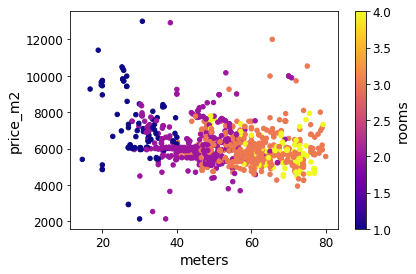

In [328]:
df.plot(kind="scatter", x="meters", y="price_m2", alpha=1,
       c="rooms", cmap=plt.get_cmap("plasma"), colorbar=True,  sharex=False)

# Korelacja

In [329]:
corr_df = df.corr()

In [330]:
corr_df["price_m2"].sort_values(ascending=False)

price_m2      1.000000
rooms        -0.287420
meters_cat   -0.304851
meters       -0.307118
Name: price_m2, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba8671a048>,
      dtype=object)

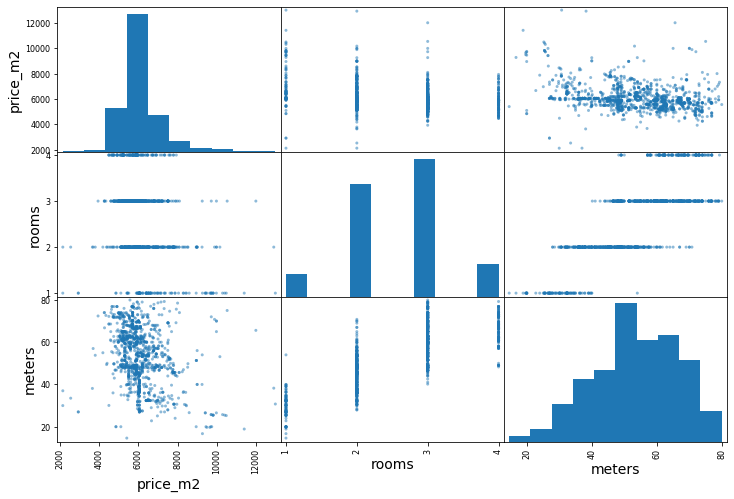

In [331]:
from pandas.plotting import scatter_matrix

attributes = ["price_m2", "rooms", "meters"]
scatter_matrix(df[attributes], figsize=(12, 8))

# Kombinacje atrybutów

In [332]:
df['meters_by_rooms'] = df['meters'] / df['rooms']
df['rooms_by_meter'] = df['rooms'] / df['meters']

In [333]:
corr_df = df.corr()
corr_df["price_m2"].sort_values(ascending=False)

price_m2           1.000000
meters_by_rooms    0.111595
rooms_by_meter    -0.064449
rooms             -0.287420
meters_cat        -0.304851
meters            -0.307118
Name: price_m2, dtype: float64

# Przygotowanie danych pod algorytmy

In [334]:
#df = strat_train_set.drop("price_m2", axis=1)
#df_labels = strat_train_set["price_m2"].copy()
df = train_set.drop("price_m2", axis=1)
df_labels = train_set["price_m2"].copy()

In [335]:
#df_num = df.select_dtypes(include=[np.number]
df_num = df.drop(['dealer', 'district', 'meters'], axis=1)

In [336]:
df_num

,rooms,meters_cat
2140,3,48.0
53,3,36.0
410,2,48.0
2205,2,22.0
2084,3,40.0
...,...,...
2041,2,31.0
2128,3,41.0
2445,4,49.0
1574,1,22.0


# Atrybuty kategorialne dla tekstu

In [337]:
from sklearn.preprocessing import OneHotEncoder

In [338]:
dealer_cat = df['dealer']

In [339]:
dealer_cat_encoded, dealer_categories = dealer_cat.factorize()
dealer_cat_encoded[:10]

array([0, 1, 2, 3, 4, 4, 5, 6, 7, 3])

In [340]:
dealer_categories

Index(['Lokum', 'ExpressHouse', 'MetrohouseLublin',
       'FRANCZEWSKANieruchomościs.c.', 'CLIVUSNieruchomości',
       'NieruchomościLalakPropertiesSpzo.o.SKA', 'Ofertaprywatna',
       'WMNieruchomości', 'HomeBrokerS.A.', 'Arena', 'NOWAKNieruchomości',
       'BiuroNieruchomościKWADRAT', 'EMPTY', '3KLUCZEs.c.', 'HERMESHOUSE',
       'ŻagielDomSp.zo.o.', 'BIGCITYBROKER', 'PrestigeBroker', 'Alfahouse',
       'ElżbietaLiberdaLexPerfectaKancelariaRadcyPrawnegoiBiuroNieruchomości',
       'PółnocNieruchomościFranczyza', 'RoyalNieruchomości', '4tepiętro',
       'VISUMNIERUCHOMOŚCI', 'GrupaOrzełNenckarski', 'WłasnyKąt',
       'LdomNieruchomości', 'HappyHome', 'StrefaM', 'LubelskieMieszkania',
       'LogoInvest', 'FreedomNieruchomościFranczyza',
       'WGNBiuroNieruchomościLublin', 'InvestorNieruchomościFranchise',
       'BESTHOUSENieruchomości', 'BWBROKERBiuroNieruchomościBartłomiejWolak',
       'K&MEstates', 'SzymanekNieruchomościSp.zo.o.', 'WIKANAS.A.',
       'BIURONIERUCHOMOŚCIA

In [341]:
encoder1 = OneHotEncoder(categories='auto')
dealer_cat_1hot = encoder1.fit_transform(dealer_cat_encoded.reshape(-1,1))
dealer_cat_1hot

<1140x67 sparse matrix of type '<class 'numpy.float64'>'
	with 1140 stored elements in Compressed Sparse Row format>

In [342]:
dealer_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [343]:
district_cat = df['district']

In [344]:
district_cat_encoded, district_categories = district_cat.factorize()
district_cat_encoded[:10]

array([0, 1, 0, 2, 0, 2, 2, 3, 3, 1])

In [345]:
district_categories

Index(['LSM', 'Śródmieście', 'Wrotków', 'Bronowice', 'Czuby', 'Węglinek',
       'Felin', 'Czechów'],
      dtype='object')

In [346]:
encoder2 = OneHotEncoder(categories='auto')
district_cat_1hot = encoder2.fit_transform(district_cat_encoded.reshape(-1,1))
district_cat_1hot

<1140x8 sparse matrix of type '<class 'numpy.float64'>'
	with 1140 stored elements in Compressed Sparse Row format>

In [347]:
district_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [348]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
  

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("Należy wybrać jedno z następujących kodowań: 'onehot', 'onehot-dense' "
                        "lub 'ordinal', wybrano %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("Należy wybrać jedną z następujących wartości parametru handle_unknown: 'error' lub "
                        "'ignore', wybrano %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("Wartość handle_unknown='ignore' nie jest obsługiwana przez parametr"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Znaleziono nieznane kategorie {0} w kolumnie {1}"
                               " podczas dopasowywania".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):

        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Znaleziono nieznane kategorie {0} w kolumnie {1}"
                           " podczas przekształcania".format(diff, i))
                    raise ValueError(msg)
                else:
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [349]:
encoder1 = CategoricalEncoder()
dealer_cat_reshaped = dealer_cat.values.reshape(-1, 1)
housing_cat_1hot = encoder1.fit_transform(dealer_cat_reshaped)
housing_cat_1hot

<1140x67 sparse matrix of type '<class 'numpy.float64'>'
	with 1140 stored elements in Compressed Sparse Row format>

In [350]:
encoder2 = CategoricalEncoder()
district_cat_reshaped = district_cat.values.reshape(-1, 1)
district_cat_1hot = encoder2.fit_transform(district_cat_reshaped)
housing_cat_1hot

<1140x67 sparse matrix of type '<class 'numpy.float64'>'
	with 1140 stored elements in Compressed Sparse Row format>

In [351]:
df_num

,rooms,meters_cat
2140,3,48.0
53,3,36.0
410,2,48.0
2205,2,22.0
2084,3,40.0
...,...,...
2041,2,31.0
2128,3,41.0
2445,4,49.0
1574,1,22.0


In [352]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_num)

In [353]:
df_num_tr

array([[ 0.51837652,  1.36189921],
       [ 0.51837652, -0.01266042],
       [-0.76073437,  1.36189921],
       ...,
       [ 1.79748741,  1.47644585],
       [-2.03984526, -1.61631332],
       [-0.76073437, -0.01266042]])

In [354]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [355]:
num_attribs = list(df_num)
cat_attribs = ["dealer", "district"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('encoder1', CategoricalEncoder(encoding="onehot-dense")),
        ('encoder2', CategoricalEncoder(encoding="onehot-dense"))
    ])

In [356]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [357]:
df_prepared = full_pipeline.fit_transform(df)
df_prepared

array([[ 0.51837652,  1.36189921,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.51837652, -0.01266042,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.76073437,  1.36189921,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.79748741,  1.47644585,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-2.03984526, -1.61631332,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.76073437, -0.01266042,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [358]:
df_prepared.shape

(1140, 152)

# Uczenie modelu

In [359]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [360]:
# Przetestujmy pełen potok na kilku próbkach uczących
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Prognozy:", lin_reg.predict(some_data_prepared))

Prognozy: [6073.5 7159.  7055.5 6328.  6421.5]


### Porównanie wyników z rzeczywistymi wartościami

In [361]:
print("Etykiety:", list(some_labels))

Etykiety: [6494.0, 9259.0, 9888.0, 5990.0, 6254.0]


In [362]:
some_data_prepared

array([[ 0.51837652,  1.36189921,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1. 

In [363]:
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

735.4285448074095

In [364]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(df_labels, df_predictions)
lin_mae

480.64956140350876

In [365]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [366]:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=1e-07, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [367]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

145.81447327392726

In [368]:
tre_mae = mean_absolute_error(df_labels, df_predictions)
tre_mae

42.45937148621359

# Regulowanie modelu

### Sprawdzian krzyżowy

In [369]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [370]:
def display_scores(scores):
    print("Wyniki:", scores)
    print("Średnia:", scores.mean())
    print("Odchylenie standardowe:", scores.std())

display_scores(tree_rmse_scores)

Wyniki: [942.96404805 791.9569513  851.95075422 630.77832588 731.98972651
 693.35846842 680.49198813 747.82797531 968.26257769 931.44465813]
Średnia: 797.1025473639804
Odchylenie standardowe: 114.16926251216027


In [371]:
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Wyniki: [1.81763022e+13 6.54435816e+02 8.57623802e+12 1.29320003e+14
 9.61118036e+02 4.82994979e+12 7.10748385e+02 1.28393484e+14
 2.19472459e+12 4.07820365e+14]
Średnia: 69931106708322.336
Odchylenie standardowe: 122904222246690.52


In [373]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(df_prepared, df_labels)

/home/adsum/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [376]:
df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

308.77853905588165

In [377]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Wyniki: [911.57575174 584.05393175 781.34053693 568.2357147  786.76139775
 624.12918555 701.13560231 655.5866     755.97397812 851.77918253]
Średnia: 722.0571881380508
Odchylenie standardowe: 108.97177184992427


In [378]:
scores = cross_val_score(lin_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     6.993111e+13
std      1.295524e+14
min      6.544358e+02
25%      5.486811e+11
50%      6.703094e+12
75%      1.008392e+14
max      4.078204e+14
dtype: float64

In [381]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(df_prepared, df_labels)
df_predictions = svm_reg.predict(df_prepared)
svm_mse = mean_squared_error(df_labels, df_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

947.4552225053365

### Metoda przeszukiwania siatki

In [387]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 15, 25, 40, 60], 'max_features': [6, 8, 9, 10, 15, 20]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [6, 8, 9, 10, 15

In [388]:
grid_search.best_params_

{'max_features': 15, 'n_estimators': 40}

In [389]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=15, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [390]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

781.7667995296789 {'max_features': 6, 'n_estimators': 5}
762.3210912692949 {'max_features': 6, 'n_estimators': 15}
755.3189015164866 {'max_features': 6, 'n_estimators': 25}
750.7371376881562 {'max_features': 6, 'n_estimators': 40}
751.9924002097027 {'max_features': 6, 'n_estimators': 60}
790.6916946258523 {'max_features': 8, 'n_estimators': 5}
764.5444155638296 {'max_features': 8, 'n_estimators': 15}
750.0350056765117 {'max_features': 8, 'n_estimators': 25}
748.0172241977601 {'max_features': 8, 'n_estimators': 40}
751.271266286596 {'max_features': 8, 'n_estimators': 60}
787.846076107474 {'max_features': 9, 'n_estimators': 5}
754.8851563620395 {'max_features': 9, 'n_estimators': 15}
746.7012333770315 {'max_features': 9, 'n_estimators': 25}
740.951642891323 {'max_features': 9, 'n_estimators': 40}
742.9518020963376 {'max_features': 9, 'n_estimators': 60}
806.6290347277952 {'max_features': 10, 'n_estimators': 5}
755.7644363253977 {'max_features': 10, 'n_estimators': 15}
745.5518670840189 {

In [391]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037612,0.002210,0.003345,0.000170,6,5,NaN,"{'max_features': 6, 'n_estimators': 5}",-7.032419e+05,-577875.473465,...,-611159.328847,54132.686570,26,-137659.238306,-172352.662350,-155460.453973,-182832.627453,-149496.057824,-159560.207981,16143.109805
1,0.093902,0.001007,0.004835,0.000093,6,15,NaN,"{'max_features': 6, 'n_estimators': 15}",-7.295180e+05,-532146.763460,...,-581133.446194,82007.186405,23,-108741.568672,-108438.725855,-114168.223470,-123955.061840,-106704.827240,-112401.681415,6295.345259
2,0.156875,0.004279,0.007076,0.000188,6,25,NaN,"{'max_features': 6, 'n_estimators': 25}",-7.142427e+05,-515114.307565,...,-570506.642988,80589.421587,21,-100586.848162,-109319.546005,-106147.134784,-121292.256494,-105360.772876,-108541.311664,6961.517683
3,0.243779,0.001811,0.010209,0.000081,6,40,NaN,"{'max_features': 6, 'n_estimators': 40}",-7.020645e+05,-505908.949621,...,-563606.249904,76903.598415,17,-93260.846561,-106780.655531,-100341.864774,-112964.136571,-98876.661630,-102444.833013,6796.396602
4,0.362298,0.001900,0.014455,0.000057,6,60,NaN,"{'max_features': 6, 'n_estimators': 60}",-6.944321e+05,-511919.855470,...,-565492.569973,73634.050460,19,-89105.056434,-99508.392890,-95813.845017,-102748.140798,-90160.736845,-95467.234397,5255.452856
5,0.033818,0.000379,0.002647,0.000017,8,5,NaN,"{'max_features': 8, 'n_estimators': 5}",-8.079455e+05,-583217.974349,...,-625193.355950,94957.501620,28,-140912.188298,-171609.843122,-151772.205788,-171861.976463,-139615.418539,-155154.326442,14182.133100
6,0.094544,0.000749,0.004742,0.000088,8,15,NaN,"{'max_features': 8, 'n_estimators': 15}",-7.385755e+05,-536796.128709,...,-584528.163370,84583.930958,24,-101775.954347,-109352.649480,-108286.333596,-121246.837689,-99596.687871,-108051.692597,7572.732594
7,0.154262,0.001052,0.006976,0.000221,8,25,NaN,"{'max_features': 8, 'n_estimators': 25}",-6.880203e+05,-507280.788866,...,-562552.509740,69506.368020,16,-96423.093007,-105965.665758,-106304.384027,-116751.584196,-98078.978538,-104704.741105,7235.490885
8,0.247143,0.001564,0.010133,0.000146,8,40,NaN,"{'max_features': 8, 'n_estimators': 40}",-6.899112e+05,-493477.136163,...,-559529.767697,74468.671259,15,-92413.813328,-103405.853495,-102436.520424,-110306.316447,-92860.555094,-100284.611758,6809.897371
9,0.364630,0.003591,0.014549,0.000169,8,60,NaN,"{'max_features': 8, 'n_estimators': 60}",-7.153794e+05,-498397.204992,...,-564408.515548,85576.814932,18,-86769.398935,-99422.967766,-95274.631202,-101869.981184,-88892.551673,-94445.906152,5836.836928


In [394]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=40),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(df_prepared, df_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [395]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

719.3621581884404 {'max_features': 39, 'n_estimators': 180}
731.978757512003 {'max_features': 29, 'n_estimators': 15}
745.3747708861675 {'max_features': 8, 'n_estimators': 189}
723.873847770355 {'max_features': 21, 'n_estimators': 103}
729.925887307673 {'max_features': 19, 'n_estimators': 75}
740.0336401146848 {'max_features': 11, 'n_estimators': 88}
721.2915624185779 {'max_features': 36, 'n_estimators': 104}
723.8823606419086 {'max_features': 24, 'n_estimators': 131}
731.8877343960125 {'max_features': 22, 'n_estimators': 53}
774.2510700578569 {'max_features': 2, 'n_estimators': 88}


In [396]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.05069237e-01, 2.52938418e-01, 2.53911659e-03, 3.81723042e-03,
       4.98325175e-03, 4.63608190e-03, 4.16328847e-04, 2.64724039e-04,
       1.50643523e-05, 3.52794187e-06, 3.28577690e-03, 4.86353770e-03,
       1.31361748e-03, 1.84966316e-03, 6.65578912e-03, 8.30194938e-03,
       5.13540610e-04, 4.06681735e-04, 1.27116168e-02, 9.07717323e-03,
       1.96374738e-03, 3.12926529e-03, 1.75767532e-04, 1.42492924e-04,
       2.17336590e-04, 1.42551988e-04, 4.18334252e-04, 2.94700132e-04,
       7.92098326e-04, 8.33559145e-04, 7.37755569e-03, 1.10549429e-02,
       2.01047932e-04, 2.74444781e-04, 1.14073355e-02, 1.11548329e-02,
       5.39916295e-04, 8.78335842e-04, 1.31949173e-03, 8.75959202e-04,
       1.93797424e-03, 2.00448055e-03, 1.60754575e-03, 1.95294979e-03,
       7.01748286e-06, 2.10194690e-05, 8.86401822e-03, 7.41591208e-03,
       7.18682640e-03, 8.37304687e-03, 2.82908788e-04, 1.13938607e-04,
       9.44221549e-04, 1.17728395e-03, 4.36763341e-02, 3.34434131e-02,
      

In [398]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("price_m2", axis=1)
y_test = test_set["price_m2"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

ValueError: Znaleziono nieznane kategorie ['LublinHouseSp.zo.o.' 'LucasApartments'] w kolumnie 0 podczas przekształcania